# Analysis of L Network Model

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import networkx as nx
from itertools import combinations
import matplotlib.pyplot as plt
import math
import seaborn as sns
import powerlaw
import community
from IPython.display import Image, display

cleaned_data_path = "cleaned_data"
networks_path = "networks"

In [2]:
# reading the network
BGNetL = nx.read_gml(f"{networks_path}/BGNetL.gml")

In [3]:
# Iterate through the edges and update the 'weight' attribute to be of type int
for u, v, attr in BGNetL.edges(data=True):
    attr['weight'] = int(attr['weight'])


# Basic Network Features

5) Network Density

In [4]:
density = nx.density(BGNetL)
print(f'Network Density: {round(density, 4)}')

Network Density: 0.0004


Comment: The network is vary sparse.

In [18]:
# links per node
links_per_node = len(BGNetL.edges())/len(BGNetL.nodes())
print(f'Links per node: {round(links_per_node, 4)}')

Links per node: 1.2339


6) What is the average distance for the network? What is the diameter of the network?

In [5]:
avg_dist = nx.average_shortest_path_length(BGNetL)
print(f'Average distance: {round(avg_dist, 2)}')

Average distance: 39.27


In [6]:
diameter = nx.diameter(BGNetL)
print(f'Network Diameter: {diameter}')

Network Diameter: 155


7) How connected and centralized this network is? What is the number of connected components and what are their sizes? Is there a giant component?

In [7]:
print(f'Is strongly connected: {nx.is_strongly_connected(BGNetL)}')
print(f'Number of strongly connected components: {nx.number_strongly_connected_components(BGNetL)}')

Is strongly connected: True
Number of strongly connected components: 1


8) What are the average and the global clustering coefficients? Show the distribution of local clustering coefficient of network's nodes. Is clustering strong or not? Answer by comparing with randomly generated Erdos-Renyi and scale free networks of the same dimension.

In [8]:
average_clustering = nx.average_clustering(BGNetL, weight='weight')
print(f'Average clustering coefficient: {round(average_clustering, 4)}')

Average clustering coefficient: 0.0011


In [9]:
global_clustering = nx.transitivity(BGNetL)
# closed_triplets = sum(nx.triangles(BGNetL).values()) // 3
# all_possible_triplets = math.comb(len(BGNetL.nodes), 3)
# global_clustering = closed_triplets/all_possible_triplets
print(f'Global clustering coefficient: {round(global_clustering, 3)}')

Global clustering coefficient: 0.037


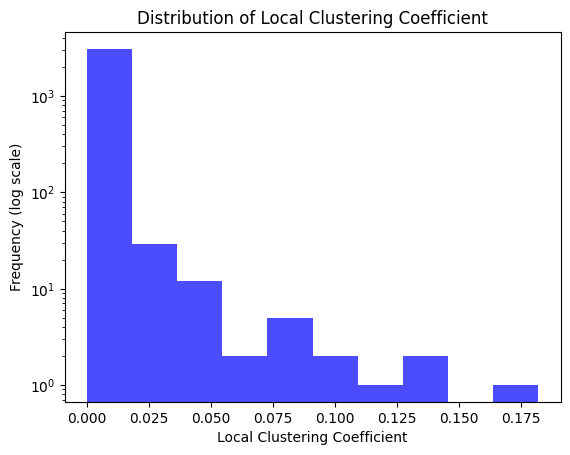

In [10]:
# Plotting the distribtion of clustering coefficients
clustering = nx.clustering(BGNetL, weight="weight")
values = list(clustering.values())

# create a histogram
plt.hist(values, bins=10, alpha=0.7, color='blue')
# log scale for y axis
plt.yscale('log')

plt.xlabel('Local Clustering Coefficient')
plt.ylabel('Frequency (log scale)')
plt.title('Distribution of Local Clustering Coefficient')

# Show the plot
plt.show()

comment: The highest number of nodes has clustering coefficient of value 0.

In [11]:
# calculate the edge creation probabiliy needed for Erdos-Renyi model
number_of_nodes = BGNetL.number_of_nodes()
num_of_edges = BGNetL.number_of_edges()
n = BGNetL.number_of_nodes()
m = BGNetL.number_of_edges()
p = ( float(m) ) / ( n* (n-1) )  # directed graph
potential_num_of_edges = num_of_edges*(num_of_edges-1)
edge_creation_probability = num_of_edges/potential_num_of_edges

In [12]:
# Erdos-Renyi and scale free models
NetER = nx.erdos_renyi_graph(number_of_nodes, p)
NetSFMulti = nx.scale_free_graph(number_of_nodes)
NetSF = nx.DiGraph()
for i, j in NetSFMulti.edges():
    if not NetSF.has_edge(i, j):
        NetSF.add_edge(i, j, weight=1)
    else:
        NetSF[i][j]['weight'] += 1

In [13]:
average_clustering_ER = nx.average_clustering(NetER)
average_clustering_SF = nx.average_clustering(NetSF)
print(f'Erdos Renyi Average Clustering Coefficient: {round(average_clustering_ER, 5)}')
print(f'Scale Free Average Clustering Coefficient: {round(average_clustering_SF, 3)}')

Erdos Renyi Average Clustering Coefficient: 0.0
Scale Free Average Clustering Coefficient: 0.067


In [15]:
average_clustering_ER = nx.average_clustering(NetER)
average_clustering_SF = nx.average_clustering(NetSF)
print(f'Erdos Renyi Average Clustering Coefficient: {round(average_clustering_ER, 5)}')
print(f'Scale Free Average Clustering Coefficient: {round(average_clustering_SF, 3)}')

Erdos Renyi Average Clustering Coefficient: 0.00158
Scale Free Average Clustering Coefficient: 0.085


comment: Clustering is weak since the network has similar average clustering coefficient as Erdos Renyi model.

9) Based on the answers from 6. and 8. determine whether this network represents a small-world network

comment: Since clustering coefficients are low and average distance between nodes is high compared to the size of network, this network does not represent a small-world network.

10. Conduct assortativity analysis by node degree and answer whether assortative mixing is expressed. Give visualisation as well.

Assortativity measures the similarity of connections in the graph with respect to the node degree. <br>
Here, I have used the overall node degree (both in and out connections are calculated).

In [16]:
degree_assortativity = nx.degree_pearson_correlation_coefficient(BGNetL)
print(f"Degree Assortativity Coefficient: {degree_assortativity:.2f}")
# degree_assortativity = nx.degree_pearson_correlation_coefficient(BGNetL, x='out', y='out')
# print(f"Degree Assortativity Coefficient (out degrees): {degree_assortativity:.2f}")
# degree_assortativity = nx.degree_pearson_correlation_coefficient(BGNetL, x='in', y='in')
# print(f"Degree Assortativity Coefficient (in degrees): {degree_assortativity:.2f}")
degree_assortativity = nx.degree_pearson_correlation_coefficient(BGNetL, weight='weight')
print(f"Weighted Degree Assortativity Coefficient: {degree_assortativity:.2f}")

Degree Assortativity Coefficient: 0.31
Weighted Degree Assortativity Coefficient: 0.55


comment: For non-weighted representation of the network assortativity mixing is mild, whereas including weights shows average assortativity mixing.

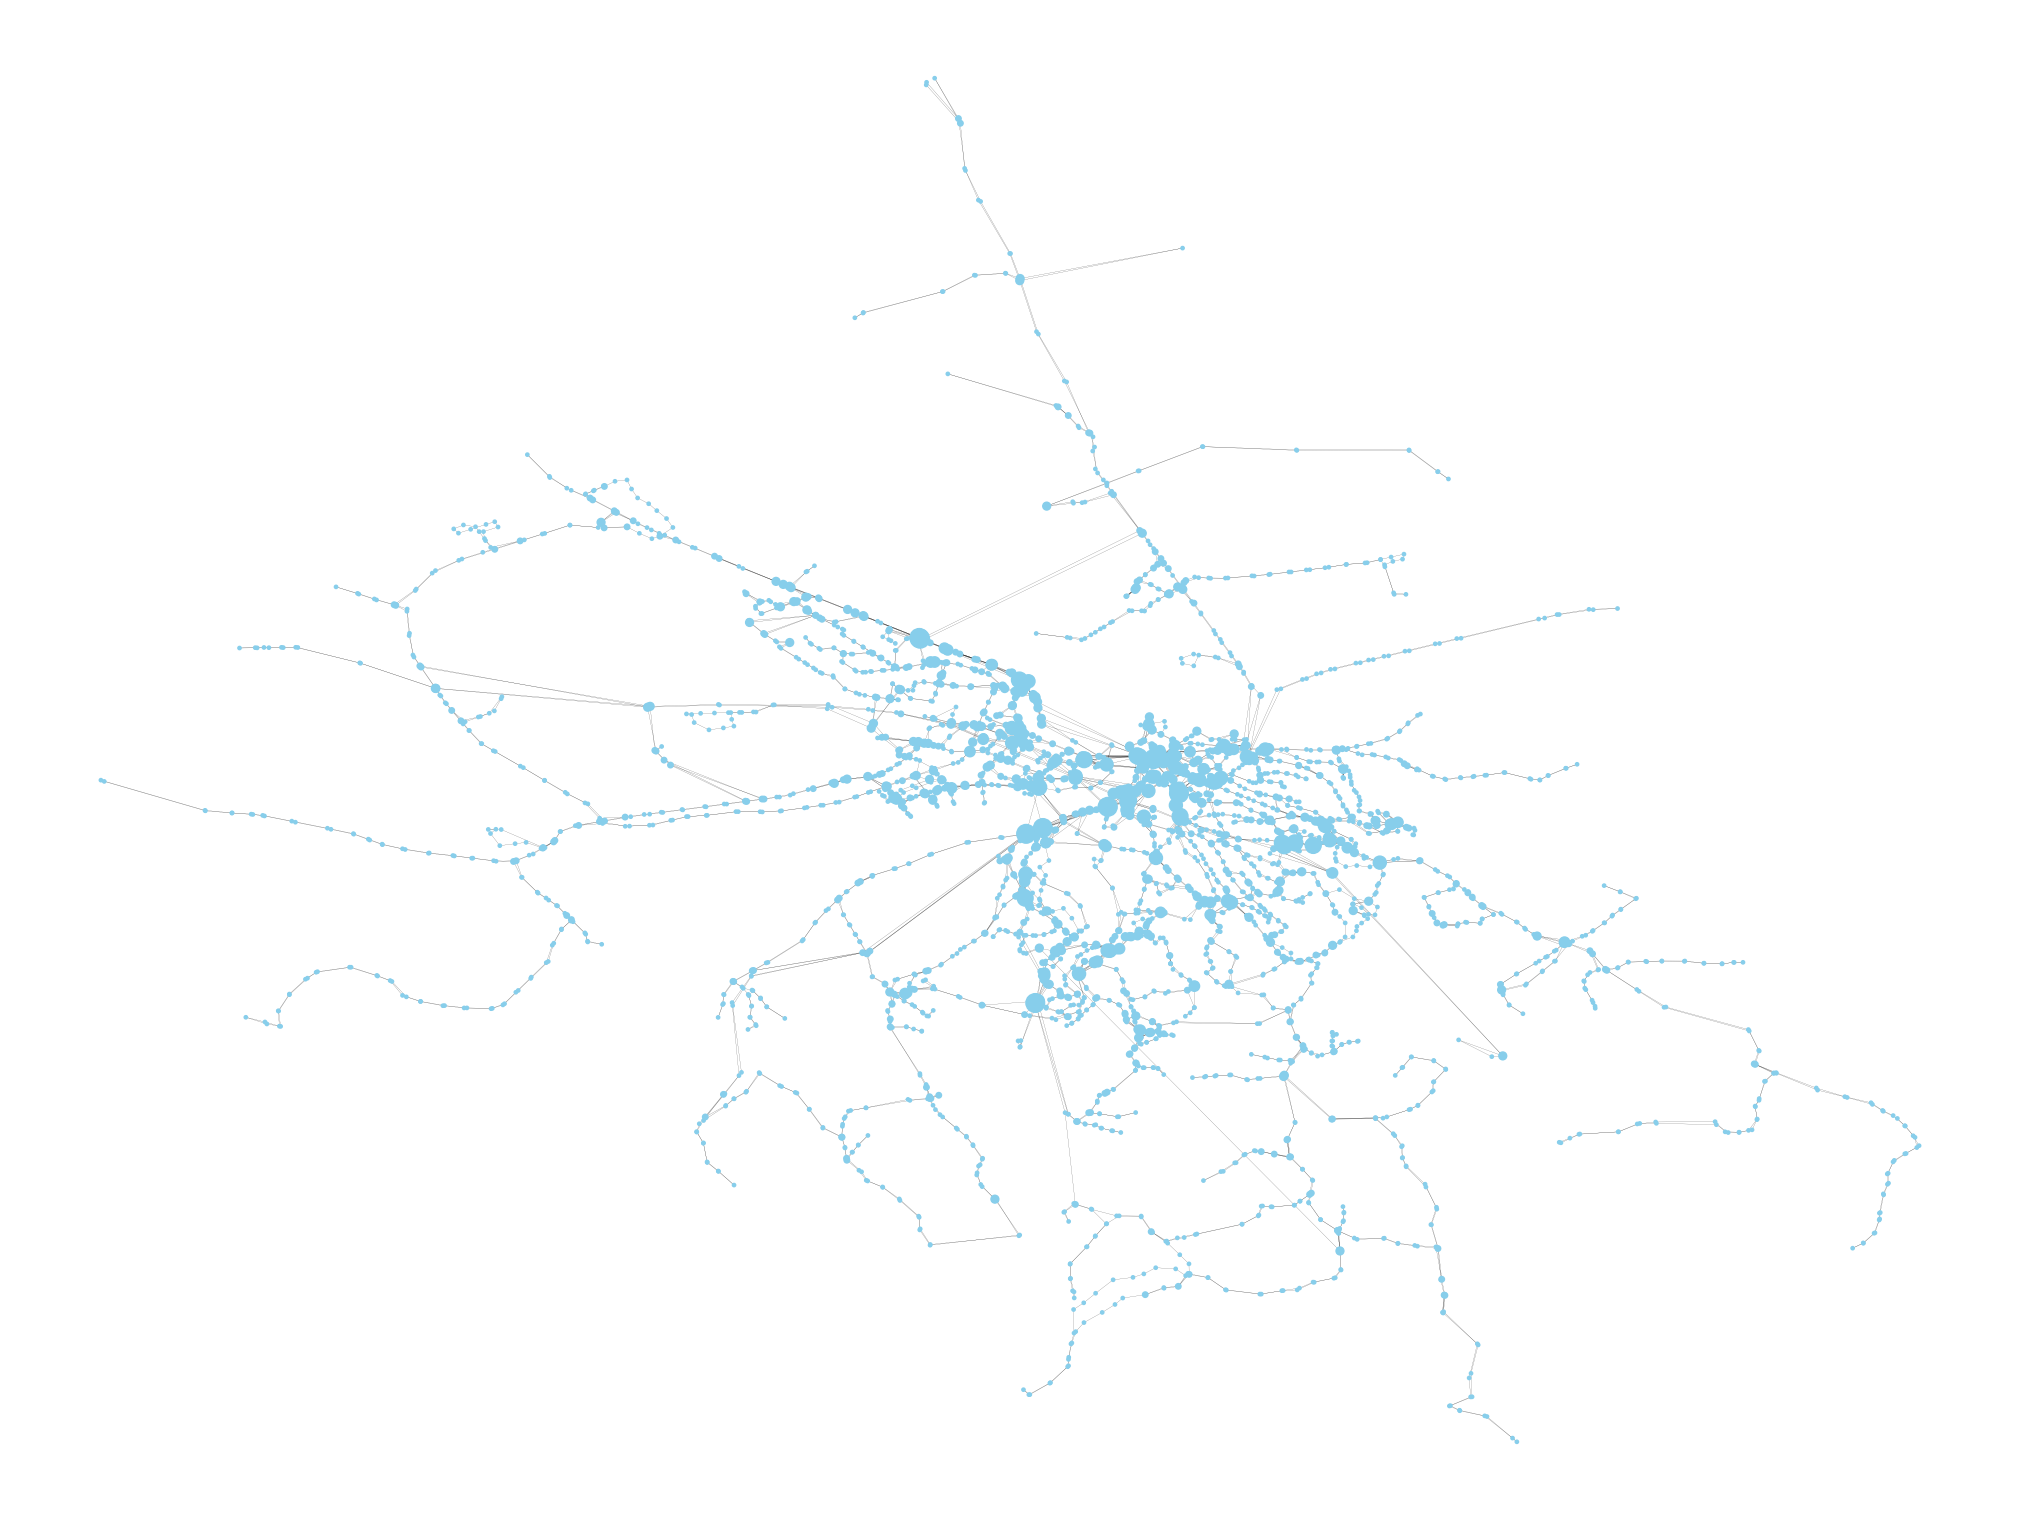

In [17]:
# Plot network; each node's size is propotional to the sqare of its degree; this is because we want to check assortativity
degrees = dict(BGNetL.degree())

node_sizes = [ degrees[node]**2.5 for node in BGNetL.nodes()]

node_positions = {node: (BGNetL.nodes[node]['stop_lon'], BGNetL.nodes[node]['stop_lat']) for node in BGNetL.nodes()}

plt.figure(figsize=(20, 15)) 
# pos = nx.kamada_kawai_layout(BGNetL)
nx.draw(BGNetL, pos=node_positions, with_labels=False, width=0.1, node_size=node_sizes, node_color='skyblue', arrows=False)

plt.margins(0, 0)
plt.gca().xaxis.set_visible(False)
plt.gca().yaxis.set_visible(False)

plt.show()


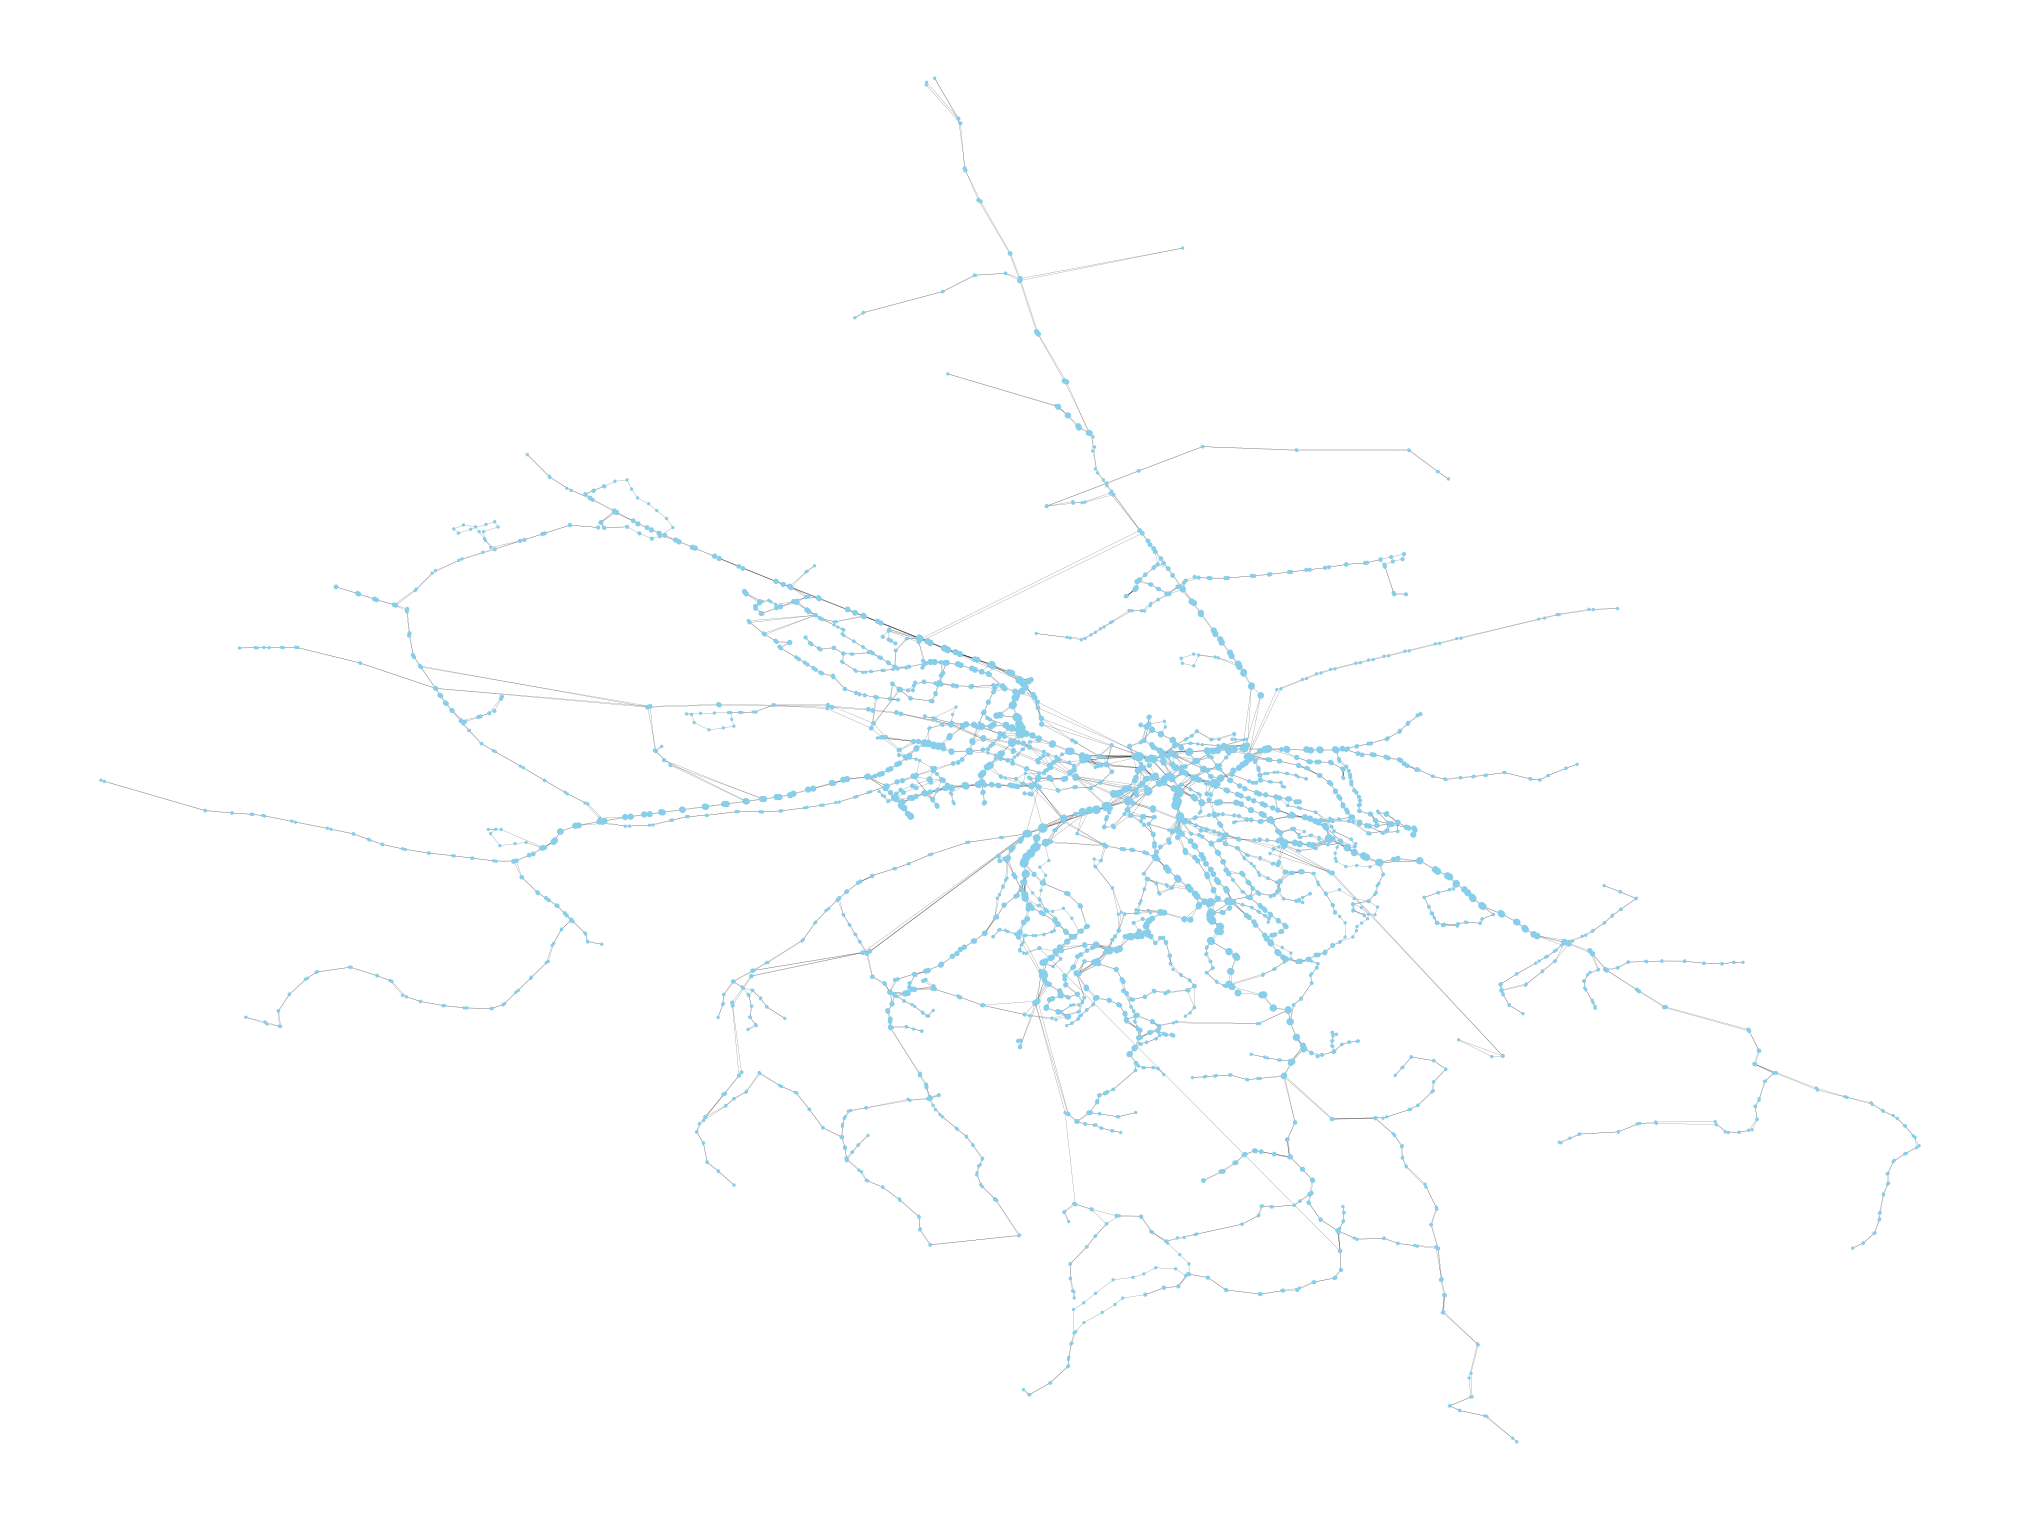

In [18]:
# Plot network; WEIGHTED DEGREE ;each node's size is propotional to the its degree; this is because we want to check assortativity
degrees = dict(BGNetL.degree(weight='weight'))

node_sizes = [ degrees[node] for node in BGNetL.nodes()]

node_positions = {node: (BGNetL.nodes[node]['stop_lon'], BGNetL.nodes[node]['stop_lat']) for node in BGNetL.nodes()}

plt.figure(figsize=(20, 15)) 
# pos = nx.kamada_kawai_layout(BGNetL)
nx.draw(BGNetL, pos=node_positions, with_labels=False, width=0.1, node_size=node_sizes, node_color='skyblue', arrows=False)

plt.margins(0, 0)
plt.gca().xaxis.set_visible(False)
plt.gca().yaxis.set_visible(False)

plt.show()


In [19]:
# Plot network; each node's size is propotional to its degree; this is because we want to check assortativity; ONLY OUT DEGREES
# degrees = dict(BGNetL.out_degree())

# node_sizes = [ degrees[node]**2.5 for node in BGNetL.nodes()]

# node_positions = {node: (BGNetL.nodes[node]['stop_lon'], BGNetL.nodes[node]['stop_lat']) for node in BGNetL.nodes()}

# plt.figure(figsize=(20, 15)) 
# # pos = nx.kamada_kawai_layout(BGNetL)
# nx.draw(BGNetL, pos=node_positions, with_labels=False, width=0.1, node_size=node_sizes, node_color='skyblue', arrows=False)

# plt.margins(0, 0)
# plt.gca().xaxis.set_visible(False)
# plt.gca().yaxis.set_visible(False)

# plt.show()


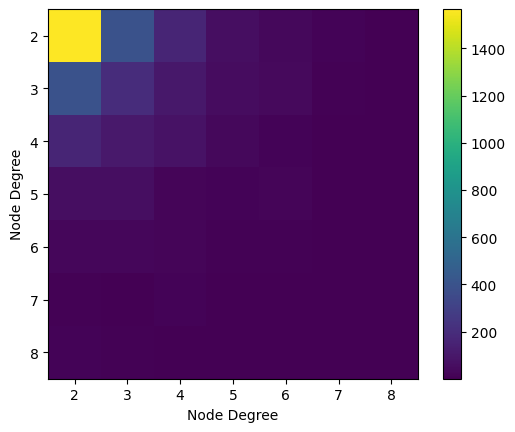

In [20]:
# Plotting a heatmap that will show node assortativity
degrees = dict(BGNetL.degree())
max_degree = max(degrees.values())
min_degree = min(degrees.values())

degree_matrix = np.zeros((max_degree - min_degree + 1, max_degree - min_degree + 1), dtype=int)

for node, degree in degrees.items():
    neighbors_of_node = list(BGNetL.successors(node))
    for neighbor in neighbors_of_node:
        degree1 = BGNetL.degree(neighbor) 
        degree_matrix[degree-2][degree1-2]+=1

plt.imshow(degree_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.xticks(ticks=range(0, max(degrees.values()) - 1), labels=range(2, max(degrees.values()) + 1))
plt.yticks(ticks=range(0, max(degrees.values()) - 1), labels=range(2, max(degrees.values()) + 1))
plt.xlabel("Node Degree")
plt.ylabel("Node Degree")
plt.show()

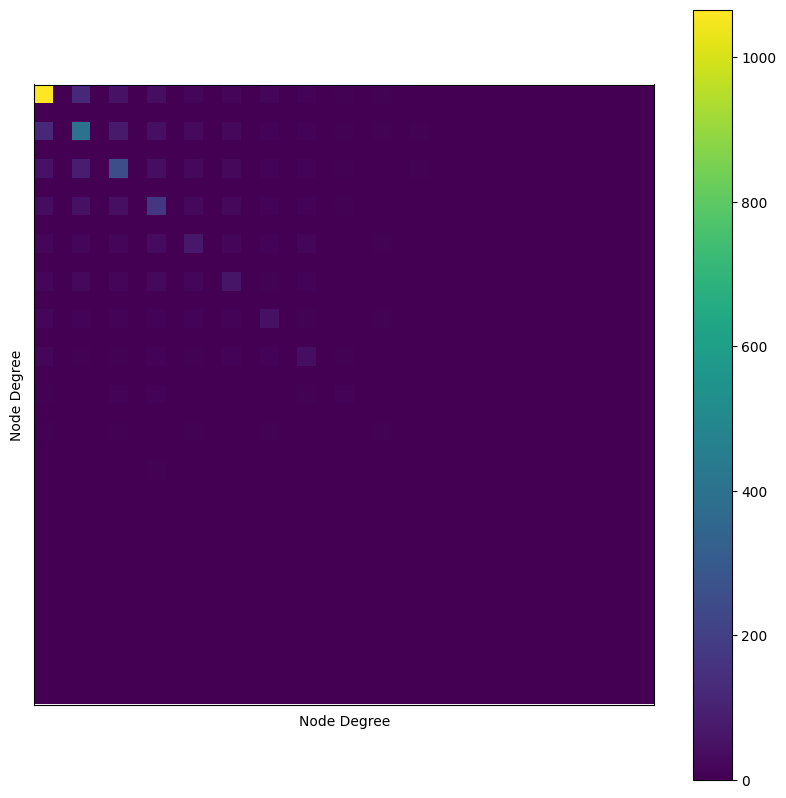

In [62]:
# Plotting a heatmap that will show node assortativity
degrees = dict(BGNetL.degree(weight='weight'))
for key in degrees:
    degrees[key] = degrees[key] 
max_degree = max(degrees.values())
min_degree = min(degrees.values())

degree_matrix = np.zeros((max_degree - min_degree + 1, max_degree - min_degree + 1), dtype=int)

for node, degree in degrees.items():
    neighbors_of_node = list(BGNetL.successors(node))
    for neighbor in neighbors_of_node:
        degree1 = BGNetL.degree(neighbor, weight='weight') 
        degree_matrix[degree-2][degree1-2]+=1
        
plt.figure(figsize=(10, 10)) 
plt.imshow(degree_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
# plt.xticks(ticks=range(0, max(degrees.values()) - 1), labels=range(2, max(degrees.values()) + 1))
# plt.yticks(ticks=range(0, max(degrees.values()) - 1), labels=range(2, max(degrees.values()) + 1))
plt.xticks([])
plt.yticks([])
plt.xlabel("Node Degree")
plt.ylabel("Node Degree")
plt.show()

In [22]:
# # OUT DEGREES ONLY
# degrees = dict(BGNetL.out_degree())
# max_degree = max(degrees.values())
# min_degree = min(degrees.values())

# # Initialize the matrix
# degree_matrix = np.zeros((max_degree - min_degree + 1, max_degree - min_degree + 1), dtype=int)

# # Iterate through the nodes and count neighboring nodes
# for node, degree in degrees.items():
#     neighbors_of_node = list(BGNetL.successors(node))
#     for neighbor in neighbors_of_node:
#         degree1 = BGNetL.out_degree(neighbor) 
#         degree_matrix[degree-1][degree1-1]+=1

# # Create a heatmap using matplotlib
# plt.imshow(degree_matrix, cmap='viridis', interpolation='nearest')

# # Add colorbar
# plt.colorbar()

# # Show the plot
# plt.show()

komentar: ostavi samo ovo za weighted i non-weighted a ostalo brisi

11. Does the network show <i>rich club phenomenon</i>? <br>
The "rich-club phenomenon" in a network refers to the tendency of nodes with a high degree (number of connections) to be more densely connected to each other than what would be expected by random chance. <br>In other words, it suggests that nodes with a higher degree are more likely to form interconnected subgraphs or "clubs."

In [23]:
# In order to use rich_club_coefficient function from NetworkX, we first have to transform the network to undirected
BGNetL_undirected = BGNetL.to_undirected()

In [24]:
nx.rich_club_coefficient(BGNetL_undirected, normalized=True)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/ubuntu/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_7765/307644549.py", line 1, in <module>
    nx.rich_club_coefficient(BGNetL_undirected, normalized=True)
  File "/home/ubuntu/.local/lib/python3.10/site-packages/networkx/utils/decorators.py", line 816, in func
    return argmap._lazy_compile(__wrapper)(*args, **kwargs)
  File "<class 'networkx.utils.decorators.argmap'> compilation 54", line 5, in argmap_rich_club_coefficient_50
  File "/home/ubuntu/.local/lib/python3.10/site-packages/networkx/algorithms/richclub.py", line 83, in rich_club_coefficient
    rc = {k: v / rcran[k] for k, v in rc.items()}
  File "/home/ubuntu/.local/lib/python3.10/site-packages/networkx/algorithms/richclub.py", line 83, in <dictcomp>
    rc = {k: v / rcran[k] for k, v in rc.items()}
ZeroDivisionError: float division by zero

During ha

comment: For some reason, this function returns division by zero. I will write my own.

In [25]:
degrees = dict(BGNetL.degree(weight='weight'))
max_degree = max(degrees.values())
max_degree

34

comment: Based on the max weighted node degree, which is 34, I chose 20 as a threshold for a 'high degree'

In [26]:
results = {}
# Iterate through nodes and get those with high degrees
node_degree = 20
nodes_with_high_degree = [node for node in BGNetL.nodes() if BGNetL.degree(node, weight='weight') > node_degree]
num_nodes = len(nodes_with_high_degree)
# Calculate the number of edges between nodes with high degree
edge_count = 0
for node1 in nodes_with_high_degree:
    for node2 in nodes_with_high_degree:
        if node1 < node2 and BGNetL.has_edge(node1, node2):
            edge_count += 1

# Calculate rich club coefficient
rich_club_coeff = edge_count/(num_nodes*(num_nodes-1))

print(f"Rich Club Coefficient for nodes with weighted degree > {node_degree}: {rich_club_coeff:.3f}")


Rich Club Coefficient for nodes with weighted degree > 20: 0.008


comment: Rich club coefficient is low, so it appears that the network does not show the rich club fenomenon.

12. <i>core-periphery</i> model

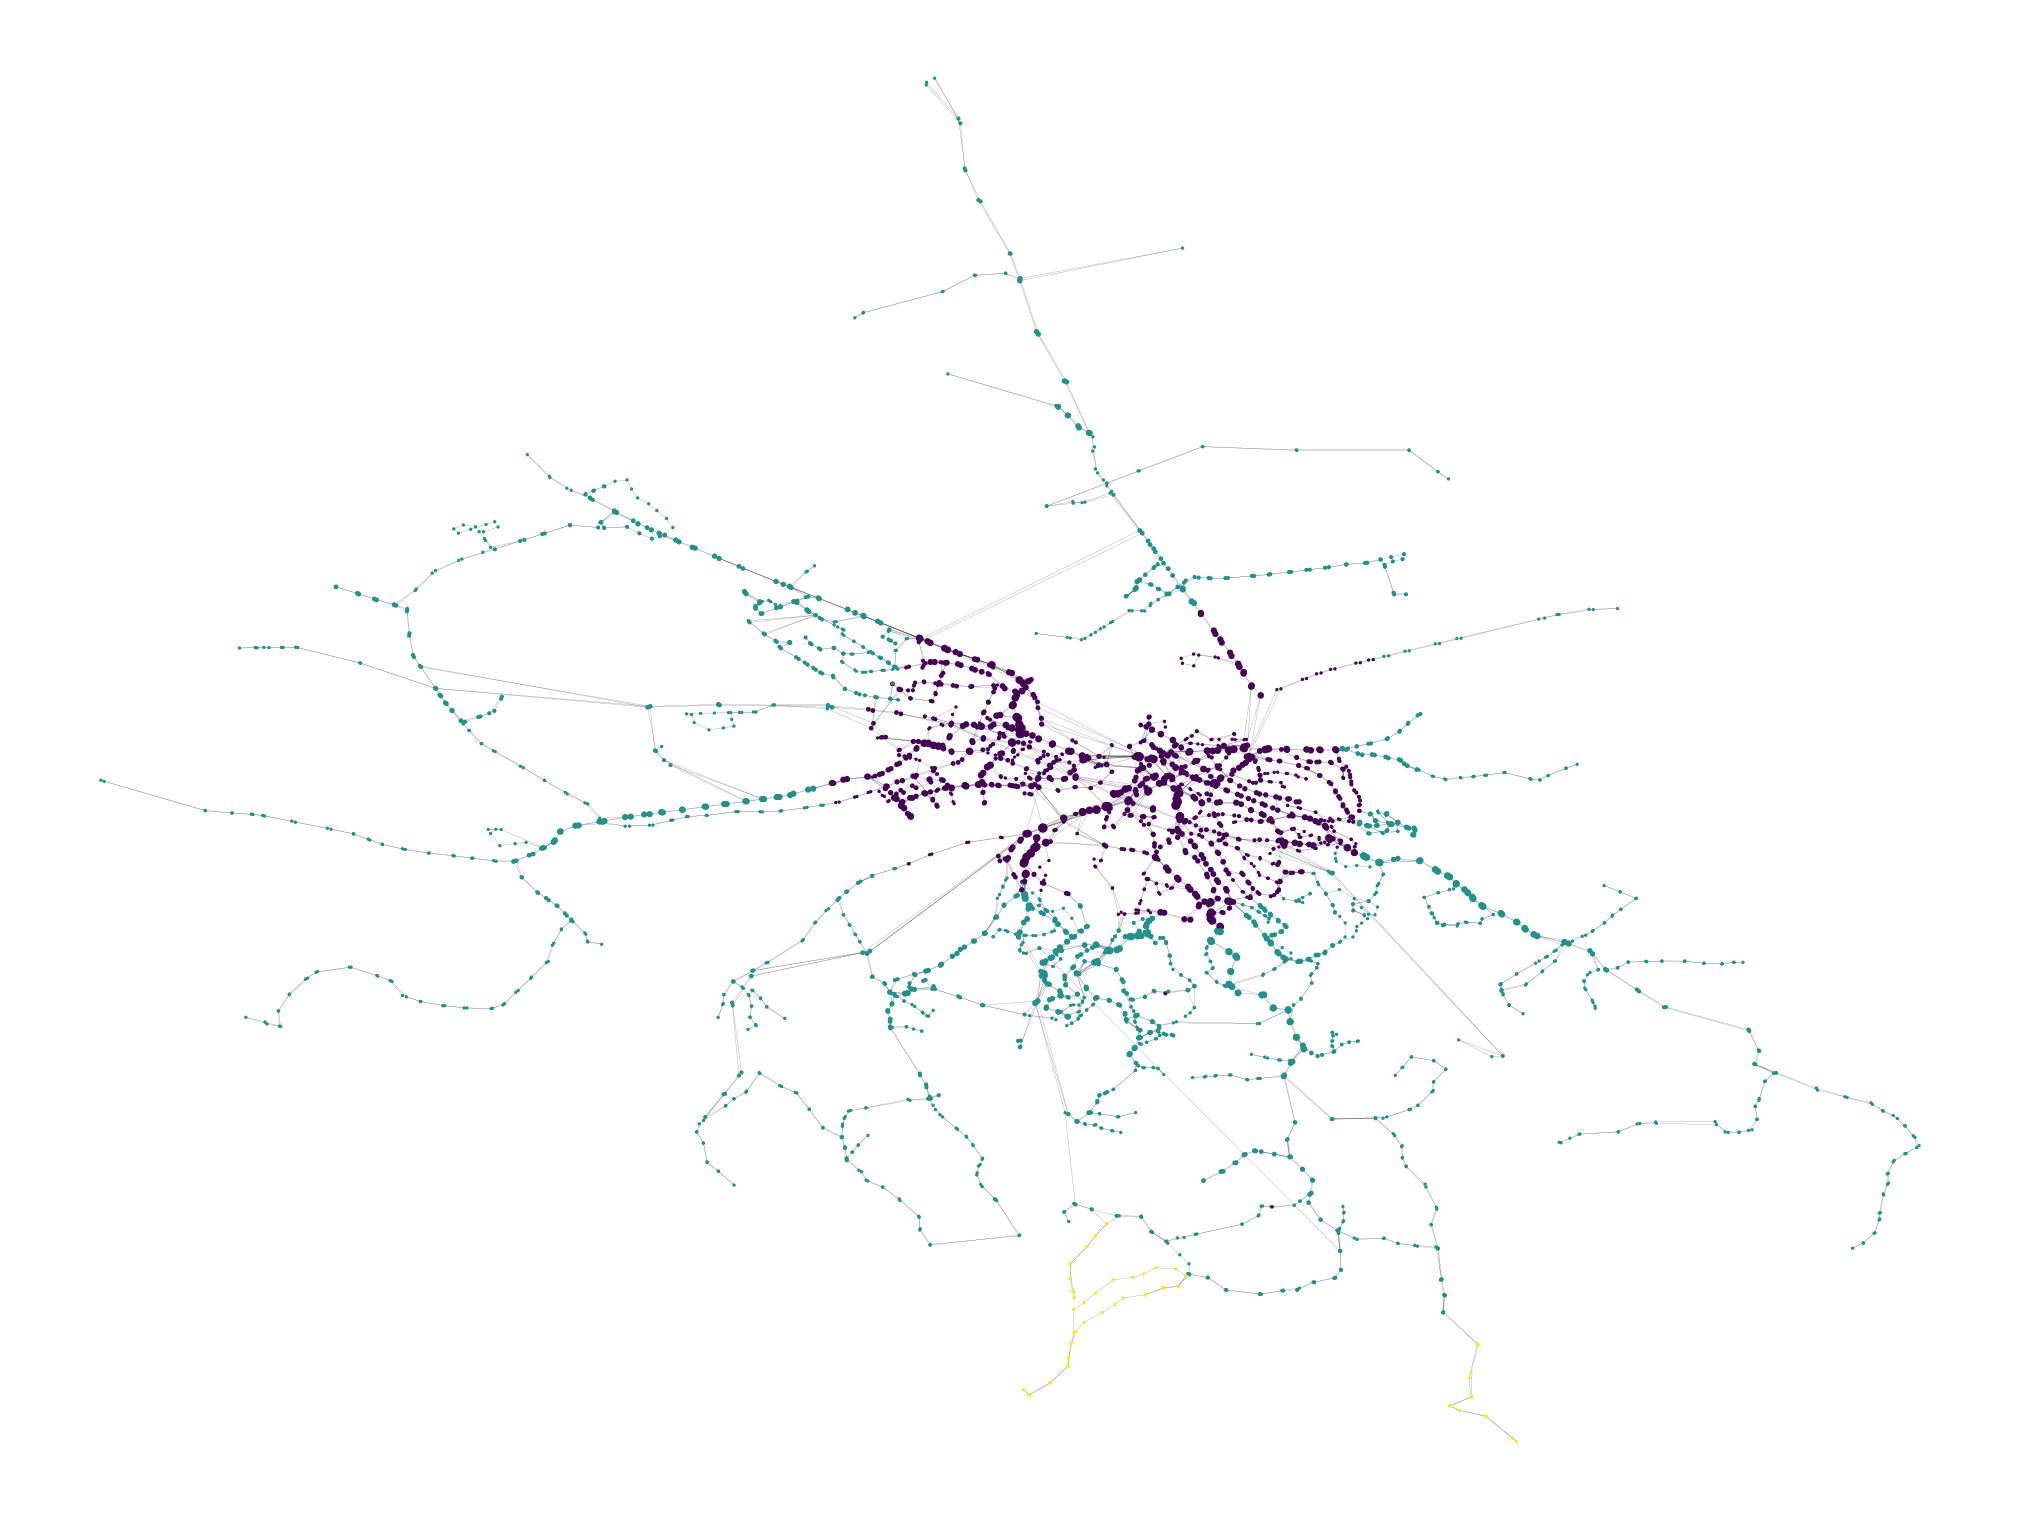

In [27]:
# Plot network for core-periphery model
degrees = dict(BGNetL.degree(weight='weight'))

node_sizes = [ degrees[node] for node in BGNetL.nodes()]

node_positions = {node: (BGNetL.nodes[node]['stop_lon'], BGNetL.nodes[node]['stop_lat']) for node in BGNetL.nodes()}

plt.figure(figsize=(20, 15)) 
node_colors = [BGNetL.nodes[node]['zone_id'] for node in BGNetL.nodes()]
nx.draw(BGNetL, pos=node_positions, with_labels=False, width=0.1, node_size=node_sizes, node_color=node_colors, arrows=False)

plt.margins(0, 0)
plt.gca().xaxis.set_visible(False)
plt.gca().yaxis.set_visible(False)

plt.show()


In [63]:
nx.periphery(BGNetL) # The periphery is the set of nodes with eccentricity equal to the diameter.

['2142']

comment: For some reason, periphery function returns error when given weight parameter. Also, for this network, it only returns 1 node.

13. Node degree distribution? Does it follow <i>power law</i> distribution?

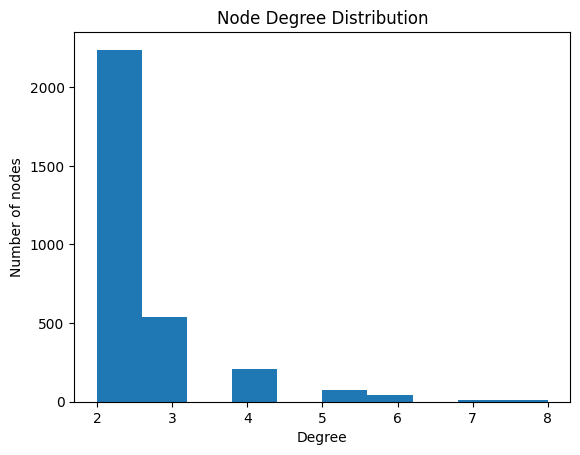

In [64]:
# Plot the histogram
degrees = dict(BGNetL.degree())

plt.hist(list(degrees.values()))

plt.xlabel('Degree')
# plt.yscale('log')
plt.ylabel('Number of nodes')
plt.title('Node Degree Distribution')

plt.show()

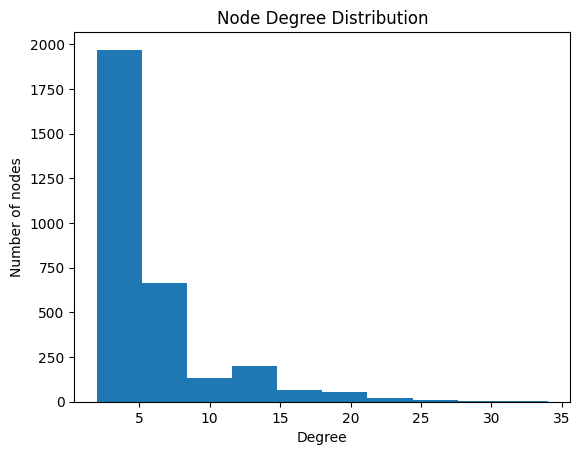

In [65]:
# Plot the histogram; weighted degrees
degrees = dict(BGNetL.degree(weight='weight'))

plt.hist(list(degrees.values()))

plt.xlabel('Degree')
# plt.yscale('log')
plt.ylabel('Number of nodes')
plt.title('Node Degree Distribution')

plt.show()

Calculating best minimal value for power law fit


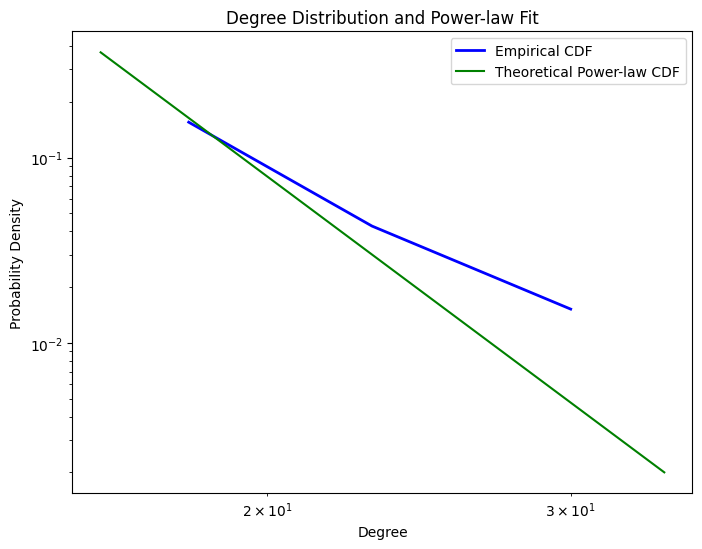

In [68]:

# Calculate node degrees
degree_sequence = sorted([d for n, d in BGNetL.degree(weight='weight')], reverse=True)

# Fit a power-law distribution using the powerlaw package
fit = powerlaw.Fit(degree_sequence)

# Create a new figure and axis
plt.figure(figsize=(8, 6))
ax = plt.gca()

# Plot the empirical PDF
fit.plot_pdf(color='b', linewidth=2, ax=ax, label='Empirical PDF')

# Plot the theoretical power-law PDF
fit.power_law.plot_pdf(color='g', ax=ax, label='Theoretical Power-law PDF')

# Add title and legend
plt.title('Degree Distribution and Power-law Fit')
plt.legend()

# Add labels to the axes
plt.xlabel('Degree')
plt.ylabel('Probability Density')

# Show the plot
plt.show()

comment: The distribution is not exactly following power-law distribution.

# Centrality Analysis

14. Conduct centrality analyses by degree, closeness and betweenness centrality. Give an overview 
the most important nodes for each of them.

In [19]:
stops_df = pd.read_csv('cleaned_data/stops.csv')

#### Degree Centrality

In [20]:
degree_centrality = nx.degree_centrality(BGNetL)
degree_centrality = {int(key): value for key, value in degree_centrality.items()}
stops_df['degree_centrality'] = stops_df['stop_id'].map(degree_centrality)

In [21]:
in_degree_centrality = nx.in_degree_centrality(BGNetL)
in_degree_centrality = {int(key): value for key, value in in_degree_centrality.items()}
stops_df['in_degree_centrality'] = stops_df['stop_id'].map(in_degree_centrality)

In [22]:
out_degree_centrality = nx.out_degree_centrality(BGNetL)
out_degree_centrality = {int(key): value for key, value in out_degree_centrality.items()}
stops_df['out_degree_centrality'] = stops_df['stop_id'].map(out_degree_centrality)

In [23]:
stops_df.sort_values(by='degree_centrality', ascending=False).head(5)

,stop_id,stop_name,stop_lat,stop_lon,zone_id,degree_centrality,in_degree_centrality,out_degree_centrality
472,503,Ada Ciganlija,44.788531,20.420025,1,0.002564,0.000641,0.001923
1117,1152,Zemun /Gornji Grad/,44.859147,20.378052,1,0.002564,0.000962,0.001603
1118,1153,Zemun /Gornji Grad/,44.858848,20.378343,1,0.002564,0.001603,0.000962
1015,1049,Zeleni Venac,44.814126,20.457628,1,0.002564,0.000962,0.001603
1614,1652,Čukarica,44.786369,20.414342,1,0.002564,0.001282,0.001282


In [24]:
stops_df.sort_values(by='in_degree_centrality', ascending=False).head(5)

,stop_id,stop_name,stop_lat,stop_lon,zone_id,degree_centrality,in_degree_centrality,out_degree_centrality
607,639,Franše Deperea,44.792892,20.466633,1,0.002244,0.001923,0.000321
157,188,Trebevićka,44.771586,20.414287,1,0.001923,0.001603,0.000321
464,495,Sajam,44.796518,20.441556,1,0.002244,0.001603,0.000641
1118,1153,Zemun /Gornji Grad/,44.858848,20.378343,1,0.002564,0.001603,0.000962
267,298,Brankov Most,44.815007,20.452724,1,0.002244,0.001603,0.000641


In [25]:
stops_df.sort_values(by='out_degree_centrality', ascending=False).head(5)

,stop_id,stop_name,stop_lat,stop_lon,zone_id,degree_centrality,in_degree_centrality,out_degree_centrality
116,147,Trg Slavija /Bulevar Oslobođenja/,44.801439,20.466256,1,0.002564,0.000321,0.002244
190,221,Konjarnik,44.782047,20.511865,1,0.002244,0.000321,0.001923
472,503,Ada Ciganlija,44.788531,20.420025,1,0.002564,0.000641,0.001923
1015,1049,Zeleni Venac,44.814126,20.457628,1,0.002564,0.000962,0.001603
156,187,Trebevićka,44.771277,20.414097,1,0.001923,0.000321,0.001603


#### Closeness Centrality

In [39]:
closeness_centrality = nx.closeness_centrality(BGNetL)
closeness_centrality = {int(key): value for key, value in closeness_centrality.items()}
stops_df['closeness_centrality'] = stops_df['stop_id'].map(closeness_centrality)

In [40]:
stops_df.sort_values(by='closeness_centrality', ascending=False).head(5)

,stop_id,stop_name,stop_lat,stop_lon,zone_id,degree_centrality,in_degree_centrality,out_degree_centrality,closeness_centrality
2436,2498,Durmitorska,44.802277,20.451564,1,0.001603,0.000962,0.000641,0.044425
3008,3106,Kula Beograd,44.802990,20.448050,1,0.001282,0.000962,0.000321,0.043258
1614,1652,Čukarica,44.786369,20.414342,1,0.002564,0.001282,0.001282,0.043234
464,495,Sajam,44.796518,20.441556,1,0.002244,0.001603,0.000641,0.042911
2434,2496,Palata Pravde,44.805034,20.453830,1,0.000962,0.000641,0.000321,0.042597


In [41]:
weighted_closeness_centrality = nx.closeness_centrality(BGNetL, distance='weight')
weighted_closeness_centrality = {int(key): value for key, value in weighted_closeness_centrality.items()}
stops_df['weighted_closeness_centrality'] = stops_df['stop_id'].map(weighted_closeness_centrality)

In [42]:
stops_df.sort_values(by='weighted_closeness_centrality', ascending=False).head(5)

,stop_id,stop_name,stop_lat,stop_lon,zone_id,degree_centrality,in_degree_centrality,out_degree_centrality,closeness_centrality,weighted_closeness_centrality
2436,2498,Durmitorska,44.802277,20.451564,1,0.001603,0.000962,0.000641,0.044425,0.017897
3008,3106,Kula Beograd,44.802990,20.448050,1,0.001282,0.000962,0.000321,0.043258,0.017598
1016,1050,Staro Sajmište,44.812170,20.441502,1,0.001603,0.000962,0.000641,0.040147,0.017270
301,332,Antifašističke Borbe,44.814948,20.424538,1,0.000962,0.000641,0.000321,0.041081,0.017241
9,10,Ekonomski Fakultet,44.810884,20.454124,1,0.001603,0.000962,0.000641,0.039813,0.017162


#### Betweenness Centrality

In [43]:
betweenness_centrality = nx.betweenness_centrality(BGNetL)
betweenness_centrality = {int(key): value for key, value in betweenness_centrality.items()}
stops_df['betweenness_centrality'] = stops_df['stop_id'].map(betweenness_centrality)

In [44]:
stops_df.sort_values(by='betweenness_centrality', ascending=False).head(5)

,stop_id,stop_name,stop_lat,stop_lon,zone_id,degree_centrality,in_degree_centrality,out_degree_centrality,closeness_centrality,weighted_closeness_centrality,betweenness_centrality
465,496,Sajam,44.796407,20.442099,1,0.002564,0.000962,0.001603,0.034319,0.013354,0.139978
464,495,Sajam,44.796518,20.441556,1,0.002244,0.001603,0.000641,0.042911,0.016320,0.137026
366,397,Sava Centar,44.807735,20.431179,1,0.001923,0.001282,0.000641,0.042425,0.016068,0.134047
161,192,Beogradska Arena /Antifašističke Borbe/,44.811749,20.422399,1,0.000962,0.000321,0.000641,0.040706,0.014876,0.118685
367,398,Sava Centar,44.807165,20.431115,1,0.001923,0.000641,0.001282,0.037944,0.015570,0.107816


In [45]:
weighted_betweenness_centrality = nx.betweenness_centrality(BGNetL, weight='weight')
weighted_betweenness_centrality = {int(key): value for key, value in weighted_betweenness_centrality.items()}
stops_df['weighted_betweenness_centrality'] = stops_df['stop_id'].map(weighted_betweenness_centrality)

In [46]:
stops_df.sort_values(by='weighted_betweenness_centrality', ascending=False).head(5)

,stop_id,stop_name,stop_lat,stop_lon,zone_id,degree_centrality,in_degree_centrality,out_degree_centrality,closeness_centrality,weighted_closeness_centrality,betweenness_centrality,weighted_betweenness_centrality
227,258,Šumice,44.782893,20.501378,1,0.002244,0.001282,0.000962,0.037078,0.015002,0.026193,0.210488
812,844,Blok 25,44.812861,20.423643,1,0.001603,0.000962,0.000641,0.039222,0.015801,0.036450,0.178677
740,772,Blok 25,44.813694,20.424730,1,0.001603,0.000641,0.000962,0.041744,0.016552,0.016883,0.174338
664,696,Sp Lasta,44.771848,20.518403,2,0.001603,0.000962,0.000641,0.037998,0.015628,0.054860,0.171074
366,397,Sava Centar,44.807735,20.431179,1,0.001923,0.001282,0.000641,0.042425,0.016068,0.134047,0.168870


15. Which nodes are the most important regarding the eigenvalue cantrality? What does it mean?

In [47]:
eigenvector_centrality = nx.eigenvector_centrality(BGNetL, max_iter=1000, weight='weight')
eigenvector_centrality = {int(key): value for key, value in eigenvector_centrality.items()}
stops_df['eigenvector_centrality'] = stops_df['stop_id'].map(eigenvector_centrality)

In [48]:
stops_df.sort_values(by='eigenvector_centrality', ascending=False).head(5)

,stop_id,stop_name,stop_lat,stop_lon,zone_id,degree_centrality,in_degree_centrality,out_degree_centrality,closeness_centrality,weighted_closeness_centrality,betweenness_centrality,weighted_betweenness_centrality,eigenvector_centrality
465,496,Sajam,44.796407,20.442099,1,0.002564,0.000962,0.001603,0.034319,0.013354,0.139978,0.121725,0.423235
3106,5015,Beograd Na Vodi,44.801343,20.443991,1,0.001603,0.000321,0.001282,0.039822,0.013191,0.006866,0.000641,0.280020
156,187,Trebevićka,44.771277,20.414097,1,0.001923,0.000321,0.001603,0.037108,0.009608,0.031506,0.004203,0.273585
3010,3108,Tc Galerija,44.801240,20.445420,1,0.000962,0.000321,0.000641,0.041469,0.014966,0.009620,0.003938,0.264892
463,494,Mostar,44.798220,20.448881,1,0.002244,0.001282,0.000962,0.040277,0.015204,0.084787,0.056542,0.250162


comment: This tells us that these nodes are well connected to some other well-connected nodes.

16. On the basis of the previous two questions, propose and construct a heuristic (composite measure of
centralities) to find the most important nodes and find them. <br> Pay attention to the type of network
which is analyzed (directed or undirected) and, accordingly, adjusted how different 
network metrics affect heuristics.

comment: I propose a metric that will just represent a weighted average of normalized 

In [49]:
betweenness = nx.betweenness_centrality(BGNetL, weight='weight')
closeness = nx.closeness_centrality(BGNetL, distance='weight')
pagerank = nx.pagerank(BGNetL, weight='weight')
eigenvector = nx.eigenvector_centrality(BGNetL,max_iter=1000, weight='weight')

# Normalize centrality values to the range [0, 1]
def normalize_centrality(centrality_values):
    max_value = max(centrality_values.values())
    min_value = min(centrality_values.values())
    normalized = {node: (value - min_value) / (max_value - min_value) for node, value in centrality_values.items()}
    return normalized

normalized_betweenness = normalize_centrality(betweenness)
normalized_closeness = normalize_centrality(closeness)
normalized_pagerank = normalize_centrality(pagerank)
normalized_eigenvector = normalize_centrality(eigenvector)


In [50]:
weight_betweenness = 0.3
weight_closeness = 0.2
weight_pagerank = 0.2
weight_eigenvector = 0.3

composite_centrality = {}

for node in normalized_betweenness:
    composite_centrality[node] = (
        weight_betweenness * normalized_betweenness[node] +
        weight_closeness * normalized_closeness[node] +
        weight_pagerank * normalized_pagerank[node] +
        weight_eigenvector * normalized_eigenvector[node]
    )
 

In [51]:
composite_centrality = {int(key): value for key, value in composite_centrality.items()}
stops_df['composite_centrality'] = stops_df['stop_id'].map(composite_centrality)

In [52]:
stops_df.sort_values(by='composite_centrality', ascending=False).head(10)

,stop_id,stop_name,stop_lat,stop_lon,zone_id,degree_centrality,in_degree_centrality,out_degree_centrality,closeness_centrality,weighted_closeness_centrality,betweenness_centrality,weighted_betweenness_centrality,eigenvector_centrality,composite_centrality
465,496,Sajam,44.796407,20.442099,1,0.002564,0.000962,0.001603,0.034319,0.013354,0.139978,0.121725,0.423235,0.760691
464,495,Sajam,44.796518,20.441556,1,0.002244,0.001603,0.000641,0.042911,0.016320,0.137026,0.137016,0.079402,0.575530
227,258,Šumice,44.782893,20.501378,1,0.002244,0.001282,0.000962,0.037078,0.015002,0.026193,0.210488,0.000007,0.522356
366,397,Sava Centar,44.807735,20.431179,1,0.001923,0.001282,0.000641,0.042425,0.016068,0.134047,0.168870,0.049956,0.509846
1615,1653,Čukarica,44.786466,20.415018,1,0.001923,0.001282,0.000641,0.034328,0.013652,0.101919,0.129397,0.000589,0.500667
1015,1049,Zeleni Venac,44.814126,20.457628,1,0.002564,0.000962,0.001603,0.040170,0.014835,0.062515,0.164074,0.000831,0.497496
267,298,Brankov Most,44.815007,20.452724,1,0.002244,0.001603,0.000641,0.041257,0.016350,0.092697,0.100233,0.000786,0.495796
1614,1652,Čukarica,44.786369,20.414342,1,0.002564,0.001282,0.001282,0.043234,0.015771,0.099536,0.130683,0.080640,0.490220
463,494,Mostar,44.798220,20.448881,1,0.002244,0.001282,0.000962,0.040277,0.015204,0.084787,0.056542,0.250162,0.485960
740,772,Blok 25,44.813694,20.424730,1,0.001603,0.000641,0.000962,0.041744,0.016552,0.016883,0.174338,0.005869,0.464428


# Community Detection using Lovein method
For the purpose of visualization and community detection, Gephi tool is utilized.

17. Conduct clustering with the Luven method (by maximizing modularity) using the Gephi tool for three different values of the resolution parameter.<br>
Construct visualizations and discuss choices the impact of the resolution parameter to the resulting clustering (cluster number and size).

1) **Parameters:**<br>
Randomize: On <br>
Use edge weights: On<br>
Resolution: 10.0<br>

    **Results:**
    Modularity: 0.795<br>
    Modularity with resolution: 9.619<br>
    Number of Communities: 9


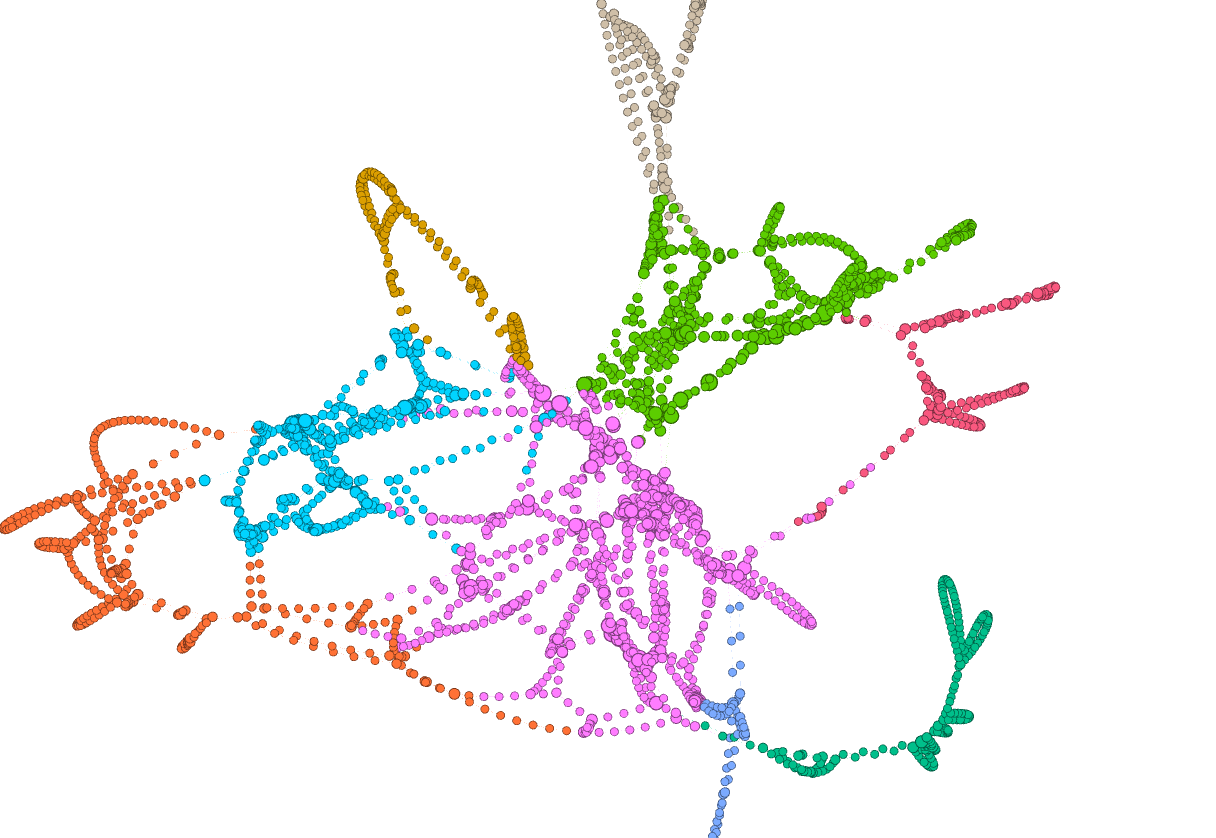

In [53]:
display(Image(filename='images/bgnetl_res_10.png'))

In [54]:
# reading the network exported from Gephi tool
BGNetL_Louvain_res_10 = nx.read_gml(f"{networks_path}/BGNetL_res_10.gml")
for node in BGNetL_Louvain_res_10.nodes():
    current_class = BGNetL_Louvain_res_10.nodes[node]['ModularityClass']
    BGNetL.nodes[node]['ModularityClassRes10'] = int(current_class)


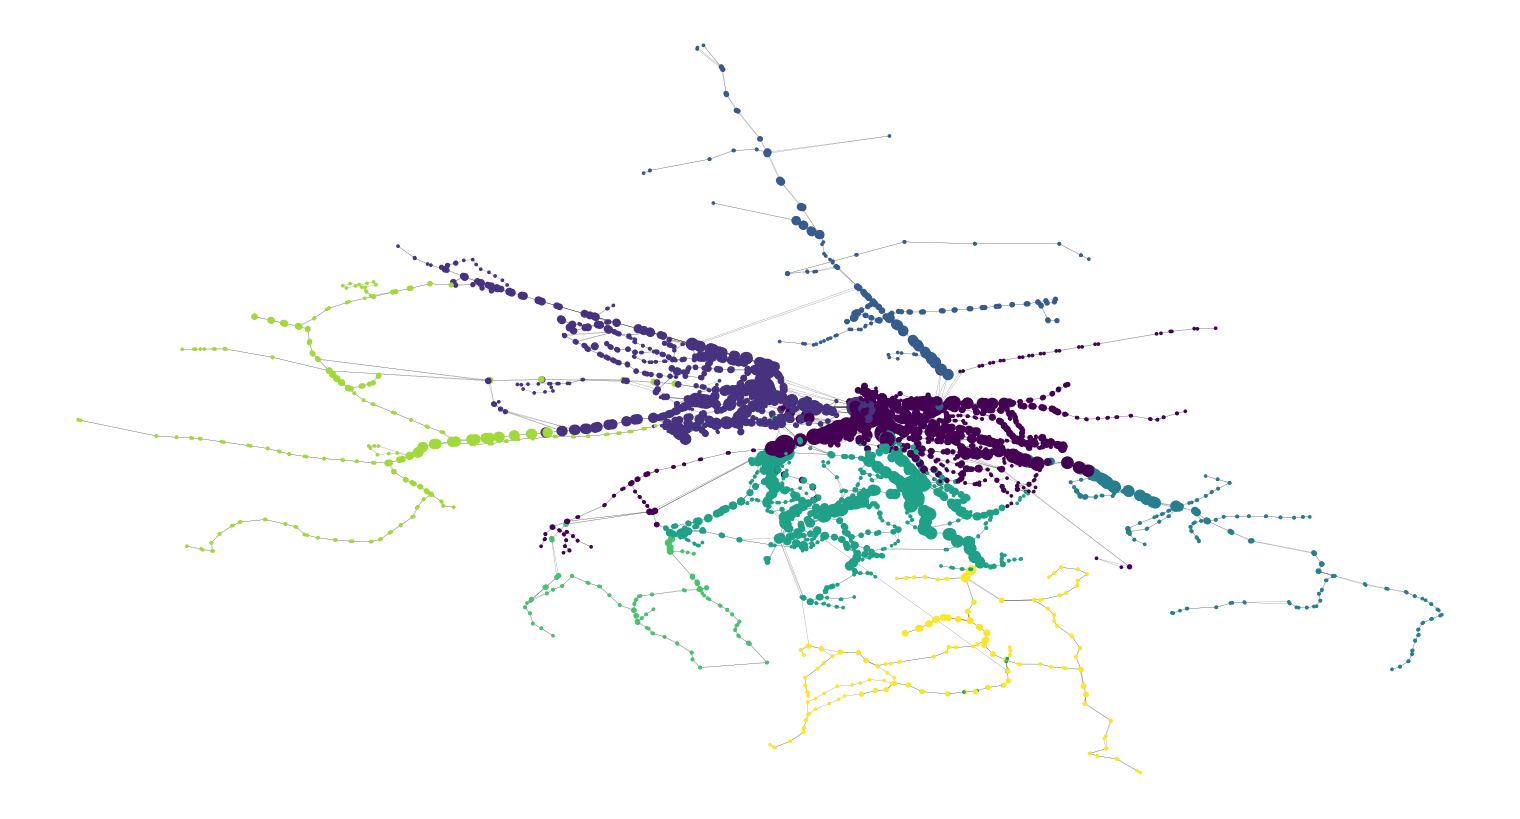

In [55]:
# Plot network to examine different communities
degrees = dict(BGNetL.degree(weight='weight'))

node_sizes = [ degrees[node]**1.5 for node in BGNetL.nodes()]

node_positions = {node: (BGNetL.nodes[node]['stop_lon'], BGNetL.nodes[node]['stop_lat']) for node in BGNetL.nodes()}

plt.figure(figsize=(15, 8)) 
node_colors = [BGNetL.nodes[node]['ModularityClassRes10'] for node in BGNetL.nodes()]
nx.draw(BGNetL, pos=node_positions, with_labels=False, width=0.1, node_size=node_sizes, node_color=node_colors, arrows=False)

plt.margins(0, 0)
plt.gca().xaxis.set_visible(False)
plt.gca().yaxis.set_visible(False)

plt.show()


2) **Parameters:**<br>
Randomize: On <br>
Use edge weights: On<br>
Resolution: 20.0<br>

    **Results:**
    Modularity: 0.655<br>
    Modularity with resolution: 19.423<br>
    Number of Communities: 4


In [56]:
# reading the network exported from Gephi tool
BGNetL_Louvain_res_20 = nx.read_gml(f"{networks_path}/BGNetL_res_20.gml")
for node in BGNetL_Louvain_res_10.nodes():
    current_class = BGNetL_Louvain_res_20.nodes[node]['ModularityClass']
    BGNetL.nodes[node]['ModularityClassRes20'] = int(current_class)


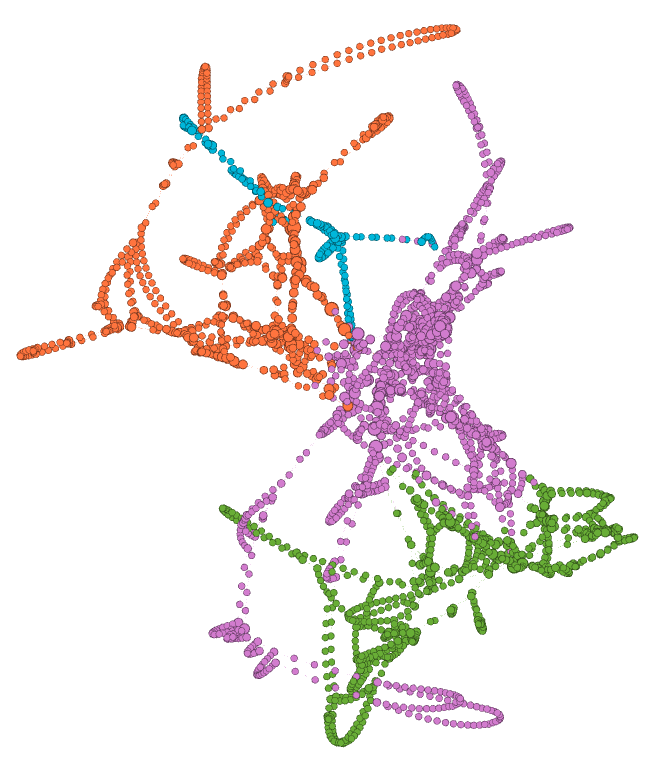

In [57]:
display(Image(filename='images/bgnetl_res_20.png'))

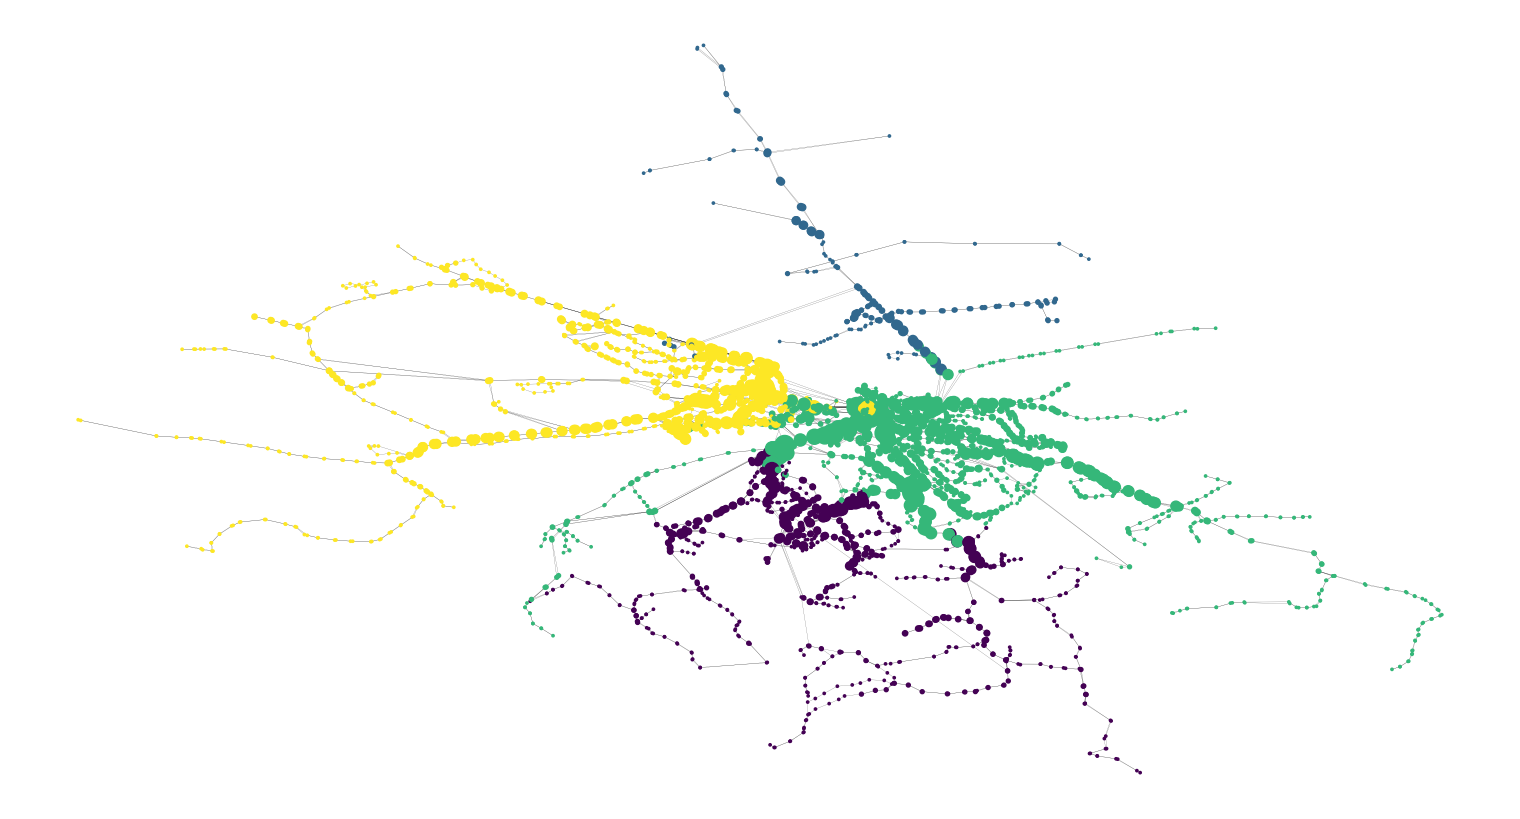

In [58]:
# Plot network to examine different communities
degrees = dict(BGNetL.degree(weight='weight'))

node_sizes = [ degrees[node]**1.5 for node in BGNetL.nodes()]

node_positions = {node: (BGNetL.nodes[node]['stop_lon'], BGNetL.nodes[node]['stop_lat']) for node in BGNetL.nodes()}

plt.figure(figsize=(15, 8)) 
node_colors = [BGNetL.nodes[node]['ModularityClassRes20'] for node in BGNetL.nodes()]
nx.draw(BGNetL, pos=node_positions, with_labels=False, width=0.1, node_size=node_sizes, node_color=node_colors, arrows=False)

plt.margins(0, 0)
plt.gca().xaxis.set_visible(False)
plt.gca().yaxis.set_visible(False)

plt.show()


2) **Parameters:**<br>
Randomize: On <br>
Use edge weights: On<br>
Resolution: 1.0<br>

    **Results:**
    Modularity: 0.898<br>
    Modularity with resolution: 0.898<br>
    Number of Communities: 31


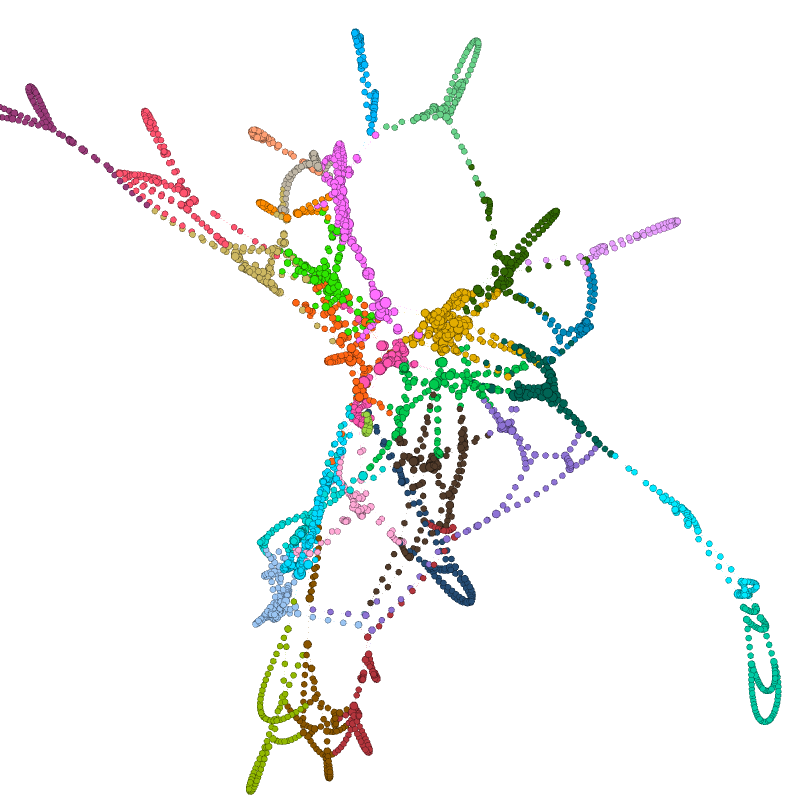

In [59]:
display(Image(filename='images/bgnetl_res_1.png'))


In [60]:
# reading the network exported from Gephi tool
BGNetL_Louvain_res_1 = nx.read_gml(f"{networks_path}/BGNetL_res_1.gml")
for node in BGNetL_Louvain_res_1.nodes():
    current_class = BGNetL_Louvain_res_1.nodes[node]['ModularityClass']
    BGNetL.nodes[node]['ModularityClassRes1'] = int(current_class)


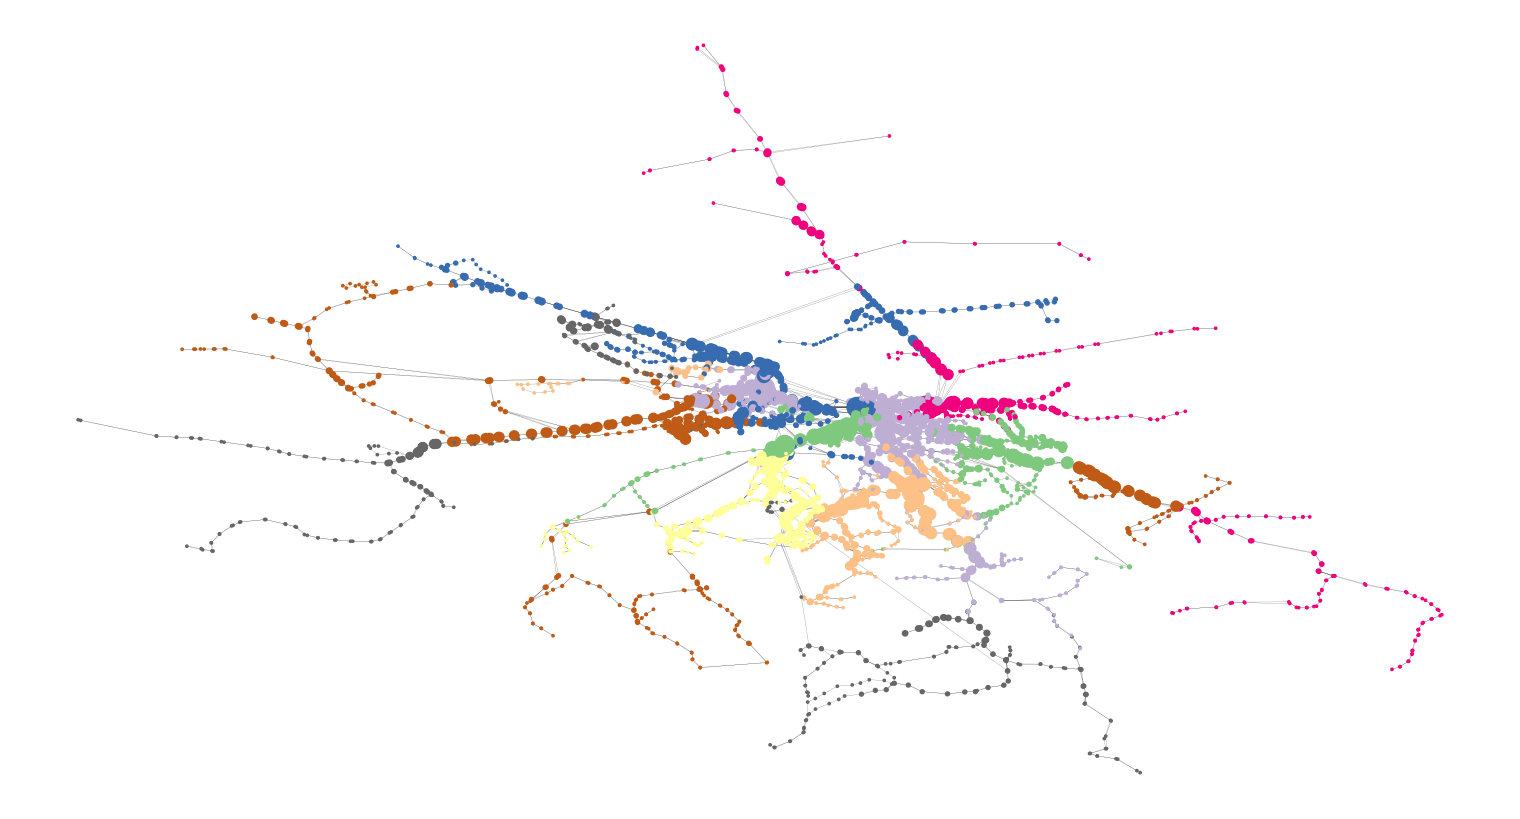

In [61]:
# Plot network to examine different communities
degrees = dict(BGNetL.degree(weight='weight'))

node_sizes = [ degrees[node]**1.5 for node in BGNetL.nodes()]

node_positions = {node: (BGNetL.nodes[node]['stop_lon'], BGNetL.nodes[node]['stop_lat']) for node in BGNetL.nodes()}

cmap = plt.cm.get_cmap('Accent')
plt.figure(figsize=(15, 8)) 
node_colors = [BGNetL.nodes[node]['ModularityClassRes1'] for node in BGNetL.nodes()]
nx.draw(BGNetL, pos=node_positions, with_labels=False, width=0.1, node_size=node_sizes, node_color=node_colors, cmap=cmap, arrows=False)

plt.margins(0, 0)
plt.gca().xaxis.set_visible(False)
plt.gca().yaxis.set_visible(False)

plt.show()


comment: Higher value of resolution parameter will produce smaller numbere of clusters (communities), and those clusters will naturally be greater in size.

18. 